In [2]:
import tensorflow as tf
import numpy as np

In [11]:
from tensorflow.keras.datasets import mnist, cifar10
(x, y), (x_val, y_val) = mnist.load_data()

In [5]:
x.shape

(60000, 28, 28)

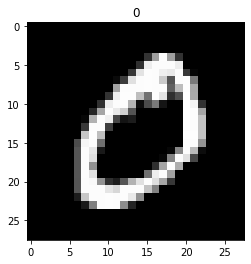

In [7]:
import matplotlib.pyplot as plt
plt.title(y[1])
plt.imshow(x[1], cmap="gray")

In [12]:
x = x.astype('float32') / 255
x_val = x_val.astype('float32') / 255

In [13]:
x.shape

(60000, 28, 28)

In [14]:
x = np.expand_dims(x, -1)
x_val = np.expand_dims(x_val, -1)

In [15]:
x.shape

(60000, 28, 28, 1)

In [16]:
y.shape

(60000,)

0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [17]:
y = tf.keras.utils.to_categorical(y)
y_val = tf.keras.utils.to_categorical(y_val)

In [18]:
y.shape

(60000, 10)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPool2D

In [32]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [33]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 16)          2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

In [35]:
model.fit(x, y, batch_size=32, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.3783 - accuracy: 0.8753 - val_loss: 0.0558 - val_accuracy: 0.9830
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0617 - accuracy: 0.9808 - val_loss: 0.0578 - val_accuracy: 0.9838
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0387 - val_accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0375 - accuracy: 0.9884 - val_loss: 0.0317 - val_accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0336 - val_accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0322 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0390 - val_accuracy

In [40]:
prediction = model.predict(x_val[0:1])
np.round(prediction)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

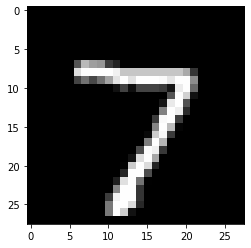

In [42]:
plt.imshow(x_val[0,...,0], cmap="gray")